In [1]:
# Iris data 불러오기
import pandas as pd

iris = pd.read_csv('https://raw.githubusercontent.com/KGW852/class/main/data/iris_data.csv')
iris.head()

,class,sepal_length,sepal_width,petal_length,petal_width
0,Iris-setosa,5.1,3.5,1.4,0.2
1,Iris-setosa,4.9,3.0,1.4,0.2
2,Iris-setosa,4.7,3.2,1.3,0.2
3,Iris-setosa,4.6,3.1,1.5,0.2
4,Iris-setosa,5.0,3.6,1.4,0.2


In [2]:
# 클래스열에 무엇이 있는지 확인해보기
print(pd.unique(iris['class']))

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [3]:
# 인풋과 아웃풋 데이터 만들기
iris_input = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].to_numpy()
iris_target = iris['class'].to_numpy()

print(iris_input[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [4]:
# 훈련세트와 테스트세트로 분리하기
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(iris_input, iris_target, random_state=42)

print(train_input.shape, test_input.shape)

(112, 4) (38, 4)


In [5]:
# 데이터 정규화
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

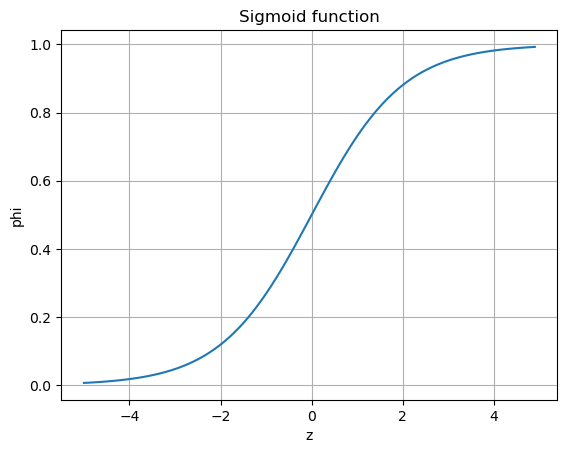

In [6]:
# 활성함수 : 시그모이드 함수(Sigmoid function)
import numpy as np
import matplotlib.pyplot as plt

z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z))

plt.plot(z, phi)
plt.title('Sigmoid function')
plt.xlabel('z')
plt.ylabel('phi')
plt.grid()
plt.show()

In [7]:
# 1. 이진분류

# boolean indexing
# 비트연산자(|)를 이용한 원하는행(가로)만 골라내기
setosa_versi_indexes = (train_target == 'Iris-setosa') | (train_target == 'Iris-versicolor')

train_setosa_versi = train_scaled[setosa_versi_indexes]
target_setosa_versi = train_target[setosa_versi_indexes]

print(train_setosa_versi.shape, target_setosa_versi.shape)

(74, 4) (74,)


In [8]:
# 로지스틱 회귀
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [9]:
# 학습
lr.fit(train_setosa_versi, target_setosa_versi)

LogisticRegression()

In [10]:
# 처음 5개 샘플 예측확인
print(lr.predict(train_setosa_versi[:5]))

['Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa']


In [11]:
# 5개 샘플에 대한 예측확률 출력
print(lr.predict_proba(train_setosa_versi[:5]))

[[0.9866775  0.0133225 ]
 [0.99594581 0.00405419]
 [0.04292568 0.95707432]
 [0.00887564 0.99112436]
 [0.98700017 0.01299983]]


In [12]:
# 클래스열 순서 확인
print(lr.classes_)

['Iris-setosa' 'Iris-versicolor']


In [13]:
# 학습한 계수 확인
print(lr.coef_, lr.intercept_)

[[ 0.9588977  -1.14896732  1.62726918  1.48072733]] [2.45415497]


In [14]:
# 회귀방정식 z 값 확인
decisions = lr.decision_function(train_setosa_versi[:5])

print(decisions)

[-4.30488891 -5.50394155  3.10441079  4.7155295  -4.32973379]


In [15]:
# z값을 시그모이드함수에 넣어 phi값 구헤보기
from scipy.special import expit

print(expit(decisions))

[0.0133225  0.00405419 0.95707432 0.99112436 0.01299983]


In [16]:
# 다중 분류

# 'setosa', 'versicolor', 'virginica' 3종의 클래스 분류 모델 만들기
# 하이퍼파라미터(L2규제 : C)

mlr = LogisticRegression(C=10, max_iter=1000)

In [17]:
# 모델 훈련
mlr.fit(train_scaled, train_target)

LogisticRegression(C=10, max_iter=1000)

In [18]:
# 분류의 정확도 출력
print(mlr.score(train_scaled, train_target))
print(mlr.score(test_scaled, test_target))

0.9821428571428571
1.0


In [19]:
# 처음 5개 샘플에 대한 예측확률 출력
print(mlr.predict(test_scaled[:5]))

['Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor']


In [20]:
# 5개 샘플에 대한 예측확률 출력
proba = mlr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

[[0.001 0.979 0.021]
 [0.992 0.008 0.   ]
 [0.    0.    1.   ]
 [0.001 0.925 0.074]
 [0.    0.928 0.072]]


In [21]:
# 클래스열 순서 확인
print(mlr.classes_)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [22]:
# 학습한 계수 확인
print(mlr.coef_.shape, mlr.intercept_.shape)

(3, 4) (3,)


In [23]:
# 회귀방정식 z 값 확인
decisions = mlr.decision_function(test_scaled[:5])

print(np.round(decisions, decimals=2))

[[ -3.44   3.65  -0.21]
 [ 11.22   6.46 -17.68]
 [-16.27   2.39  13.88]
 [ -3.71   3.12   0.59]
 [ -5.8    4.18   1.62]]


In [24]:
# z값을 소프트맥스함수에 넣어 e_sum값 구하기
from scipy.special import softmax

proba = softmax(decisions, axis=1)

print(np.round(proba, decimals=3))

[[0.001 0.979 0.021]
 [0.992 0.008 0.   ]
 [0.    0.    1.   ]
 [0.001 0.925 0.074]
 [0.    0.928 0.072]]


### 이하 내용은 이해를 위해 결정경계를 시각화하기 위한 코드입니다. 

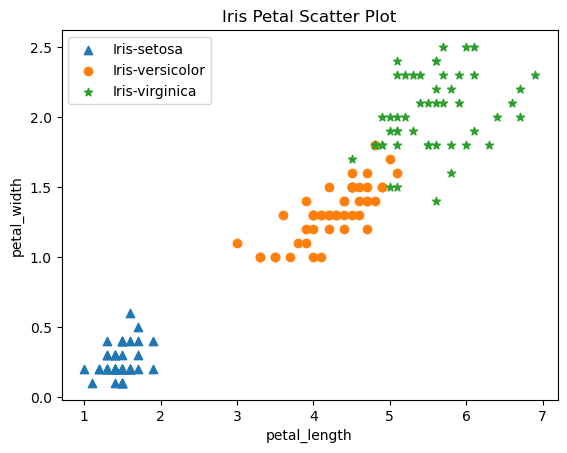

In [25]:
# 산점도 test1
setosa_petal_length = iris.loc[iris['class'] == 'Iris-setosa', 'petal_length'].to_numpy()
setosa_petal_width = iris.loc[iris['class'] == 'Iris-setosa', 'petal_width'].to_numpy()
versicolor_petal_length = iris.loc[iris['class'] == 'Iris-versicolor', 'petal_length'].to_numpy()
versicolor_petal_width = iris.loc[iris['class'] == 'Iris-versicolor', 'petal_width'].to_numpy()
virginica_petal_length = iris.loc[iris['class'] == 'Iris-virginica', 'petal_length'].to_numpy()
virginica_petal_width = iris.loc[iris['class'] == 'Iris-virginica', 'petal_width'].to_numpy()

plt.scatter(setosa_petal_length, setosa_petal_width, marker='^', label='Iris-setosa')
plt.scatter(versicolor_petal_length, versicolor_petal_width, marker='o', label='Iris-versicolor')
plt.scatter(virginica_petal_length, virginica_petal_width, marker='*', label='Iris-virginica')

plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.title('Iris Petal Scatter Plot')
plt.legend()
plt.show()

In [26]:
# 결정경계 시각화...ㅜ

# 인풋과 아웃풋 데이터 만들기
petal_input = iris[['petal_length', 'petal_width']].to_numpy()
petal_target = iris['class'].to_numpy()

# 훈련세트와 테스트세트로 분리하기
train_input, test_input, train_target, test_target = train_test_split(petal_input, petal_target, random_state=42)

print(train_input.shape, test_input.shape)

# 데이터 정규화
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)


# 타깃 정수형 변환
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train_target)
train_target_encoded = le.transform(train_target)

(112, 2) (38, 2)


In [27]:
# 모델 학습
lr2 = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

In [28]:
lr2.fit(train_scaled, train_target_encoded)

LogisticRegression(max_iter=1000, multi_class='multinomial')

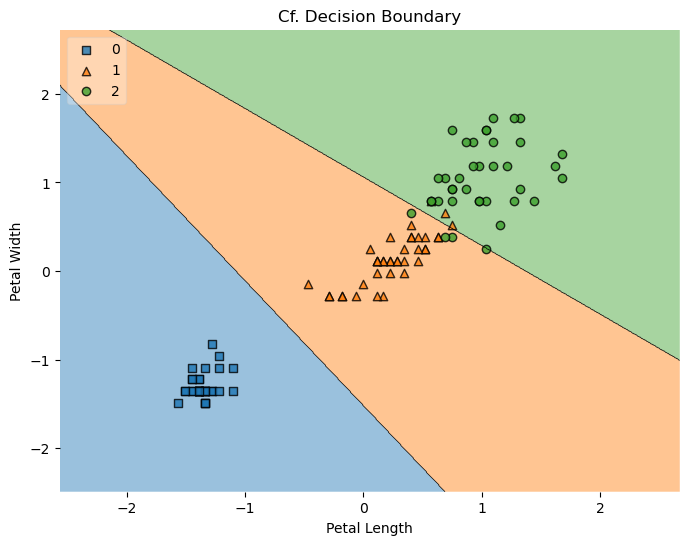

In [33]:
# 결정 경계 시각화
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(8, 6))
plot_decision_regions(train_scaled, train_target_encoded, clf=lr2, legend=2)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Cf. Decision Boundary')

path = r'C:\Users\KGW\OneDrive\수업자료(학부)\코딩과응용\수업자료\11주차\Figure11\decision boundary.png'
plt.savefig(path, dpi=300)

In [30]:
from mpl_toolkits.mplot3d import Axes3D

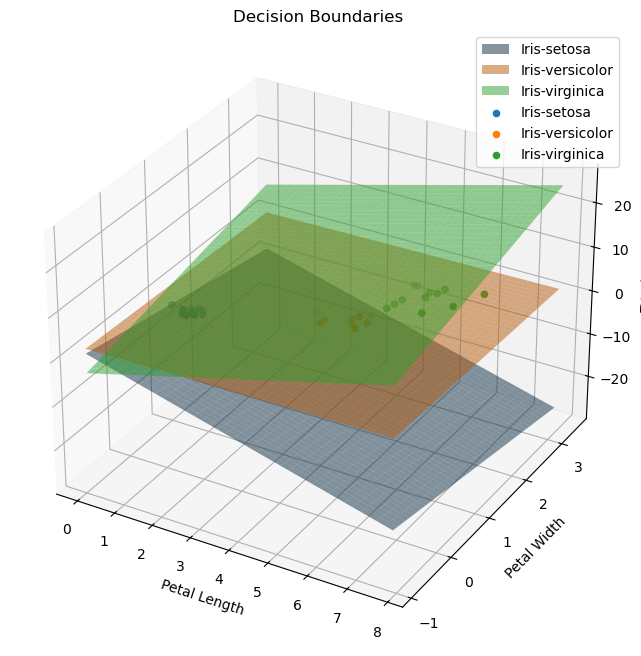

In [34]:
x1_min, x1_max = petal_input[:, 0].min() - 1, petal_input[:, 0].max() + 1
x2_min, x2_max = petal_input[:, 1].min() - 1, petal_input[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1), np.arange(x2_min, x2_max, 0.1))

# 각 클래스에 대한 z 값 계산
Z_values = lr2.coef_ @ np.c_[xx1.ravel(), xx2.ravel()].T + lr2.intercept_[:, np.newaxis]

# 3차원 시각화
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# 각 클래스에 대한 z 값 표시
for i, class_name in enumerate(le.classes_):
    ax.plot_surface(xx1, xx2, Z_values[i].reshape(xx1.shape), alpha=0.5, label=class_name)

# 데이터 포인트 표시
for i, class_name in enumerate(le.classes_):
    idx = (test_target == class_name)
    ax.scatter(test_input[idx, 0], test_input[idx, 1], lr2.decision_function(test_scaled)[idx, i], marker='o', label=class_name)

ax.set_xlabel('Petal Length')
ax.set_ylabel('Petal Width')
ax.set_zlabel('Z Value')
ax.set_title('Decision Boundaries')
ax.legend()

path = r'C:\Users\KGW\OneDrive\수업자료(학부)\코딩과응용\수업자료\11주차\Figure11\3D decision boundary.png'
plt.savefig(path)